# Distributed Grover's Optimizer
____


 This python notebook is useful to exploit the <b> Grover's adaptive search </b> implemented according the D-NISQ reference model proposed in the article "Distributed Noisy-Intermediate Scale Quantum:an Application to Grover-based Algorithms" by Giovanni Acampora, Ferdinando Di Martino, Alfredo Massa, Roberto Schiattarella, Autilia Vitiello submitted to the journal Information Fusion (Elsevier).
 
 For more detail about the  Grover's Adaptive Search (GAS) algorithm and its distributed version on the D-NISQ architecture, please, refer to the aforementioned paper.
 
 
Let us start importing the required libreries. 


In [32]:
import DistributedGroverOptimizer_2 as DGO
import functions as f
from qiskit.test.mock import FakeMelbourne
from qiskit.providers import BaseBackend
from qiskit.providers import Backend
from qiskit.providers.aer import QasmSimulator
from qiskit import *

Then, it is necessary to set all the parameters required for the GAS algorithm execution. In detail,
 
 - RUN: Number of executions of the GAS. It has to be an integer value;
 - MAX_ITERATIONS_LIST: list of integer values representing the tested termination criteria for the GAS algorithm. In detail, the algorithm ends after a certain number of iterations without improvement. The list contains the possible values for this kind of termination criterion;
 - REPORT_FILE: if True create a .txt and a .xlsx report file. This report file contains the outputs of each sub-problem and the output for the main problem once all the sub-problems have been solved;
 - FILE_NAME: to be specified if REPORT_FILE is True;
 - VERBOSE: True for a description of what is going on in each thread;
 - NOISE: If False a noiseless simulation will be executed exploiting the 'qasm_simulator'; if True it will be executed a noisy simulation using the FakeMelbourne() backend. Please, note that a noisy simulation can require a great amount of time;
 - NUMBER_OF_SUBPROBLEMS: Number of sub-problems created from the <i> Distribution Layer </i> of the D-NISQ Architecture. For each sub-problem a thread will be created. Because of the distribution approach highlighted in the paper it has to be a power of 2.   Use 1 to exectue the not distributed version of the GAS algorithm; 
 
 - N_VAR: Number of variables of the objective function;
 - label_function: String describing the label of one of the functions used in the paper (for instance, 'f2' for using as objective function the function $f_2$ indicated in the paper).

In [33]:
# SETTINGS ------------------------------------------------------------------------------------------------------------

RUN = 10                                                 # Runs of DGO for fixed number of iterations without improvement
MAX_ITERATIONS_LIST = [1,2,3,4,5]                              # Loop over these numbers of iterations without improvement
REPORT_FILE = False                                 # Create a .txt and a .xlsx report file
FILE_NAME = f"f2"
VERBOSE = False                                 # Print what the threads are doing

NOISE = False                                          # False for ideal simulation, True to apply a noise model  
NUMBER_OF_SUBPROBLEMS = 4                             # It must be a power of 2. Set 1 for standard Grover Optimizer
                                                       # without parallelism
N_VAR = 4                                             # Number of variables of the objective function

# Label of the function as reported in the paper
label_function = "f2"

After setting, the optimizer can be implemented by the <i> Distributed_Grover_Optimizer </i> function implemented in  DistributedGroverOptimizer_2.py.
The status of the process can be tracked during the executiong looking the displayed outputs. The final table reports the whole results. In detail, each row refers to one of the different termination criterion specified in the variable <i>MAX_ITERATIONS_LIST </i>. For each termination criterion it is indicated the success rate of the algorithm and its number of iterations averaged on executed threads and the number of executions (set in the <i>RUN</i> variable).





In [34]:
if NOISE:
    MOCK_BACKEND = FakeMelbourne()
else:
    MOCK_BACKEND = Aer.get_backend('qasm_simulator')

Distributed_search  = DGO.Distributed_Grover_Optimizer(RUN = RUN, NUMBER_OF_SUBPROBLEMS = NUMBER_OF_SUBPROBLEMS, N_VAR = N_VAR, OBJECTIVE_FUNCTION = f.function(label_function),
                                 MAX_ITERATIONS_LIST = MAX_ITERATIONS_LIST, REPORT_FILE=REPORT_FILE, FILE_NAME=FILE_NAME, SHOW_GAS_STEPS=VERBOSE, NOISE=NOISE, MOCK_BACKEND=MOCK_BACKEND)


MAIN Q.U.B.O PROBLEM TO SOLVE:

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_model5

Minimize
 obj: - x0 + 2 x1 - 3 x2 + x3 + [ - 4 x0*x2 - 10 x0*x3 - 2 x1*x2 + 4 x1*x3 ]/2
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1

Binaries
 x0 x1 x2 x3
End


Expected result for main problem:
x=[1. 0. 1. 1.]
fval=-10.0

Sub-Q.U.B.O. problem:

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_model5

Minimize
 obj: - 3 x2 + x3
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1

Binaries
 x0 x1 x2 x3
End


Sub-Q.U.B.O. problem:

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_model5

Minimize
 obj: - 4 x2 + 3 x3 + 2
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1

Binaries
 x0 x1 x2 x3
End


Sub-Q.U.B.O. problem:

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_mode


Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 1 1 0]
fval = -3.0

Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [0 1 1 1]
fval = -10.0

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [0 0 1 0]
fval = -2.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [0 1 1 1]
fval = -7.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 2
 Run: 2

Starting threads...

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [1 1 1 0]
fval = -2.0

Thread 4 is done

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 0]
fval = -3.0

Grover Optimizer results for subproblem 4:
x = [1 0 1 1]
fval = -7.0

Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [0 1 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O.


Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [0 0 1 0]
fval = -3.0

Thread 2 is done

Thread 3 is done

Grover Optimizer results for subproblem 2:

Grover Optimizer results for subproblem 3:x = [0 1 1 0]
fval = -2.0

x = [0 0 1 1]
fval = -10.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [0 1 1 1]
fval = -7.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 3
 Run: 4

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [0 0 0 0]
fval = 0.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [0 0 1 1]
fval = -7.0

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [1 1 1 0]
fval = -2.0

Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [0 1 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. 


Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [0 0 1 0]
fval = -3.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [0 1 1 1]
fval = -7.0

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [1 1 1 0]
fval = -2.0

Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [0 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 4
 Run: 6

Starting threads...

Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [1 0 1 1]
fval = -10.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [1 1 1 1]
fval = -7.0

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [1 0 1 0]
fval = -2.0

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 1 1 0]
fval = -3.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O.


Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [1 1 1 1]
fval = -10.0

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [1 1 1 0]
fval = -2.0

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [0 1 1 0]
fval = -3.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [1 0 1 1]
fval = -7.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 5
 Run: 8

Starting threads...

Thread 3 is done

Grover Optimizer results for subproblem 3:
x = [0 0 1 1]
fval = -10.0

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [0 0 1 0]
fval = -3.0

Thread 4 is done

Grover Optimizer results for subproblem 4:
x = [1 0 1 1]
fval = -7.0

Thread 2 is done

Grover Optimizer results for subproblem 2:
x = [1 0 1 0]
fval = -2.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O.

The success rate of the distributed version of GAS algorithm can be compared with its non-distributed counterpart. It is possible to run the non-distributed counterpart easly by setting  <i> NUMBER_OF_SUBPROBLEMS = 1 </i>. 

In [36]:
NUMBER_OF_SUBPROBLEMS = 1
Standard_search = DGO.Distributed_Grover_Optimizer(RUN = RUN, NUMBER_OF_SUBPROBLEMS = NUMBER_OF_SUBPROBLEMS, N_VAR = N_VAR, OBJECTIVE_FUNCTION = f.function(label_function),
                                 MAX_ITERATIONS_LIST = MAX_ITERATIONS_LIST, REPORT_FILE=REPORT_FILE, FILE_NAME=FILE_NAME, SHOW_GAS_STEPS=VERBOSE, NOISE=NOISE, MOCK_BACKEND=MOCK_BACKEND)


MAIN Q.U.B.O PROBLEM TO SOLVE:

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_model6

Minimize
 obj: - x0 + 2 x1 - 3 x2 + x3 + [ - 4 x0*x2 - 10 x0*x3 - 2 x1*x2 + 4 x1*x3 ]/2
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1

Binaries
 x0 x1 x2 x3
End


Expected result for main problem:
x=[1. 0. 1. 1.]
fval=-10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 1
 Run: 1

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 1
 Run: 2

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 1 1 0]
fval = -5.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 1 1 0]
fval = -5.0

 DISTRIBUTED


Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 3
 Run: 5

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 3
 Run: 6

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 1 1 1]
fval = -7.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 1 1 1]
fval = -7.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 3
 Run: 7

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [0 0 0 0]
fval = 0.0






Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 5
 Run: 9

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0

 DISTRIBUTED GROVER OPTIMIZER
 Max iterations without improvement: 5
 Run: 10

Starting threads...

Thread 1 is done

Grover Optimizer results for subproblem 1:
x = [1 0 1 1]
fval = -10.0



All threads are done!

DISTRIBUTED GROVER OPTIMIZER RESULT FOR MAIN Q.U.B.O. PROBLEM:
x = [1 0 1 1]
fval = -10.0


WITH 1 ITERATIONS:
Success probability: 0.2
Average i parameter reached: 2


WITH 2 ITERATIONS:
Success probability: 0.6
Average i parameter reached: 7


WITH 3 ITERATIONS:
Success pro

 The results of the comparison can be displayed by means of a histogram.

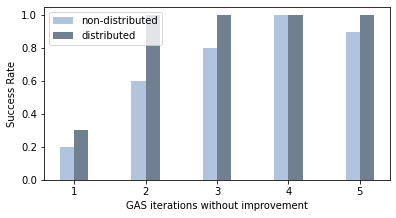

In [37]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0.1, 0.25, 0.8, 0.6]) # main axes
plt.bar(np.arange(len(MAX_ITERATIONS_LIST))-0.1, Standard_search[0], width = 0.2, label='non-distributed', color='lightsteelblue')
plt.bar(np.arange(len(MAX_ITERATIONS_LIST))+0.1, Distributed_search[0], width=0.2, label='distributed', color='slategray')
ax.set_xticks(np.arange(len(MAX_ITERATIONS_LIST)))
ax.set_xticklabels([str(i) for i in MAX_ITERATIONS_LIST])
ax.set_xlabel('GAS iterations without improvement')
ax.set_ylabel('Success Rate')
ax.legend()


At the same way, it can be analysed the number of iterations of the GAS algorithm executed until satisfying the termination criterion both for the distributed and non-distributed version.

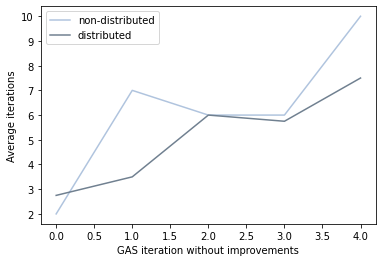

In [38]:
plt.plot(range(len(MAX_ITERATIONS_LIST)), Standard_search[1], label='non-distributed', color='lightsteelblue')
plt.plot(range(len(MAX_ITERATIONS_LIST)), Distributed_search[1], label='distributed', color='slategray')
plt.legend()
plt.xlabel('GAS iteration without improvements')
plt.ylabel('Average iterations')
plt.draw()
